In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

597

In [6]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c715df40c6b9cf1cb0123b1d1532be1f'

In [7]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yenagoa
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | sarahan
Processing Record 4 of Set 1 | xining
Processing Record 5 of Set 1 | union
Processing Record 6 of Set 1 | dayong
Processing Record 7 of Set 1 | byron bay
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | araucaria
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | brigham city
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | rawson
Pr

Processing Record 38 of Set 4 | koson
Processing Record 39 of Set 4 | batagay-alyta
Processing Record 40 of Set 4 | flinders
Processing Record 41 of Set 4 | pasni
Processing Record 42 of Set 4 | delano
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | ponnani
Processing Record 46 of Set 4 | kondopoga
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | shu
Processing Record 49 of Set 4 | richards bay
Processing Record 50 of Set 4 | banmankhi
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | florenville
Processing Record 3 of Set 5 | shalakusha
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | calatrava
Processing Record 6 of Set 5 | wattegama
Processing Record 7 of Set 5 | khuzdar
Processing Record 8 of Set 5 | malwan
City not found. Skipping...
Processing Record 9 of Set 5 | kalevala
Processing Record 10 of Set 5 | gawler
Processing Record 11 of Set 5 | thom

Processing Record 31 of Set 8 | usinsk
Processing Record 32 of Set 8 | tombouctou
Processing Record 33 of Set 8 | pergamino
Processing Record 34 of Set 8 | sovetskaya gavan
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | luancheng
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | tsimlyansk
Processing Record 39 of Set 8 | stabat
Processing Record 40 of Set 8 | port hardy
Processing Record 41 of Set 8 | isla mujeres
Processing Record 42 of Set 8 | mmabatho
Processing Record 43 of Set 8 | alenquer
Processing Record 44 of Set 8 | nishihara
Processing Record 45 of Set 8 | belmonte
Processing Record 46 of Set 8 | antu
Processing Record 47 of Set 8 | lakes entrance
Processing Record 48 of Set 8 | hofn
Processing Record 49 of Set 8 | progreso
Processing Record 50 of Set 8 | valleyview
Processing Record 1 of Set 9 | la asuncion
Processing Record 2 of Set 9 | thayetmyo
Processing Record 3 of Set 9 | harer
P

Processing Record 18 of Set 12 | gilgit
Processing Record 19 of Set 12 | powell river
Processing Record 20 of Set 12 | waddan
Processing Record 21 of Set 12 | la romana
Processing Record 22 of Set 12 | sompeta
Processing Record 23 of Set 12 | san francisco de macoris
Processing Record 24 of Set 12 | moerai
Processing Record 25 of Set 12 | bestobe
Processing Record 26 of Set 12 | pulandian
Processing Record 27 of Set 12 | muros
Processing Record 28 of Set 12 | manggar
Processing Record 29 of Set 12 | mogadishu
Processing Record 30 of Set 12 | ariquemes
Processing Record 31 of Set 12 | machali
Processing Record 32 of Set 12 | jaisalmer
Processing Record 33 of Set 12 | pangody
Processing Record 34 of Set 12 | matara
Processing Record 35 of Set 12 | mago
Processing Record 36 of Set 12 | honiara
Processing Record 37 of Set 12 | verkhoyansk
Processing Record 38 of Set 12 | lavrentiya
Processing Record 39 of Set 12 | mugumu
Processing Record 40 of Set 12 | neuquen
Processing Record 41 of Set 

In [8]:
len(city_data)

557

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yenagoa,4.9247,6.2642,76.93,92,54,3.42,NG,2022-04-17 04:21:26
1,Nikolskoye,59.7035,30.7861,34.79,76,50,2.33,RU,2022-04-17 04:21:27
2,Sarahan,31.5167,77.8000,64.87,28,0,2.28,IN,2022-04-17 04:21:27
3,Xining,36.6167,101.7667,46.81,38,81,8.97,CN,2022-04-17 04:21:27
4,Union,40.6334,-74.2663,46.94,87,100,8.05,US,2022-04-17 04:16:48
5,Dayong,25.0209,118.2898,71.64,47,80,3.94,CN,2022-04-17 04:21:28
6,Byron Bay,-28.6500,153.6167,72.95,71,100,9.44,AU,2022-04-17 04:20:57
7,Arraial Do Cabo,-22.9661,-42.0278,71.62,74,4,16.80,BR,2022-04-17 04:21:28
8,Mataura,-46.1927,168.8643,53.47,48,95,2.46,NZ,2022-04-17 04:21:29
9,Araucaria,-25.5931,-49.4103,56.01,92,58,5.46,BR,2022-04-17 04:21:29


In [10]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yenagoa,NG,2022-04-17 04:21:26,4.9247,6.2642,76.93,92,54,3.42
1,Nikolskoye,RU,2022-04-17 04:21:27,59.7035,30.7861,34.79,76,50,2.33
2,Sarahan,IN,2022-04-17 04:21:27,31.5167,77.8000,64.87,28,0,2.28
3,Xining,CN,2022-04-17 04:21:27,36.6167,101.7667,46.81,38,81,8.97
4,Union,US,2022-04-17 04:16:48,40.6334,-74.2663,46.94,87,100,8.05
5,Dayong,CN,2022-04-17 04:21:28,25.0209,118.2898,71.64,47,80,3.94
6,Byron Bay,AU,2022-04-17 04:20:57,-28.6500,153.6167,72.95,71,100,9.44
7,Arraial Do Cabo,BR,2022-04-17 04:21:28,-22.9661,-42.0278,71.62,74,4,16.80
8,Mataura,NZ,2022-04-17 04:21:29,-46.1927,168.8643,53.47,48,95,2.46
9,Araucaria,BR,2022-04-17 04:21:29,-25.5931,-49.4103,56.01,92,58,5.46


In [11]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1650169465.927941

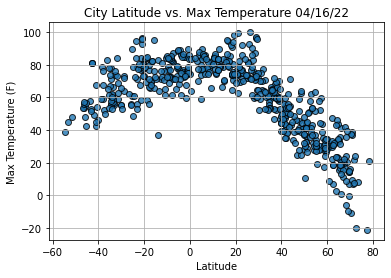

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

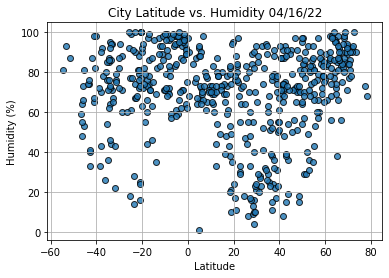

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

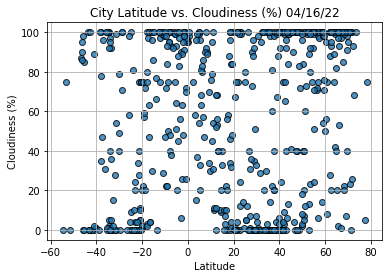

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

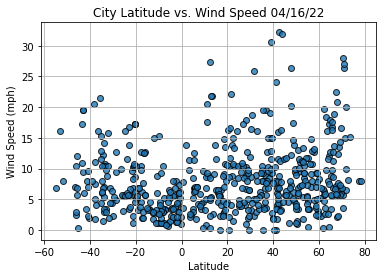

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# The slope, intercept, r_value, p_value, and std_errare always returned when we run the linregress function. If you don't want to calculate one of these values but do not add it inside the parentheses, you'll get a ValueError: too many values to unpack.
# To prevent this error, add a comma and underscore for each value you don't want to calculate.
# For instance, if you don't want to print out the p-value and the standard error, write your function as (slope, intercept, r_value, _, _) = linregress(x, y).

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [21]:
# In statistics, the p-value is used to determine significance of results. In most cases, data scientists like to use a significance level of 0.05, which means:
# A linear regression with a p-value > 0.05 is not statistically significant.
# A linear regression with a p-value < 0.05 is statistically significant.
# P-values can also be used to justify rejecting a null hypothesis. We will discuss p-values and hypothesis testing in more detail later in the course

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

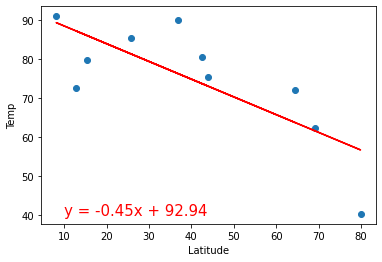

In [22]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# Let's review what this code does:
   # We plot the latitudes and temperatures on a scatter plot.
   # We create a line plot of our regression line with the ideal temperatures.
   # We annotate the line plot by adding the equation of our regression line, where the x-axis is 10 and the y-axis is 40, and specify the font and color.
   # We create x- and y-axes labels.

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [80]:
# row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2022-04-14 02:26:52
Lat                      -34.4187
Lng                       19.2345
Max Temp                    61.81
Humidity                       87
Cloudiness                    100
Wind Speed                   7.87
Name: 13, dtype: object

In [81]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
539     True
540    False
541     True
542     True
543    False
Name: Lat, Length: 544, dtype: bool

In [82]:
# Also, since this is a DataFrame, we can add the head() method at the end to get the first five rows, not counting the row of column headings.
# city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Eureka,US,2022-04-14 02:31:48,40.8021,-124.1637,46.92,79,100,10.00
8,Muros,ES,2022-04-14 02:31:48,42.7762,-9.0603,47.84,93,100,4.70
11,Albany,US,2022-04-14 02:28:16,42.6001,-73.9662,63.79,75,88,3.98
15,Bollnas,SE,2022-04-14 02:31:50,61.3482,16.3946,35.98,99,100,0.43
19,Bethel,US,2022-04-14 02:28:04,41.3712,-73.4140,64.49,75,0,0.00
...,...,...,...,...,...,...,...,...,...
535,Puerto Gaitan,CO,2022-04-14 02:33:57,4.3133,-72.0816,82.78,62,99,4.61
538,Jining,CN,2022-04-14 02:33:58,35.4050,116.5814,63.43,22,100,8.16
539,Saint-Ambroise,CA,2022-04-14 02:33:58,48.5501,-71.3324,42.40,39,53,2.30
541,Fukue,JP,2022-04-14 02:27:31,32.6881,128.8419,59.36,100,75,18.41


In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

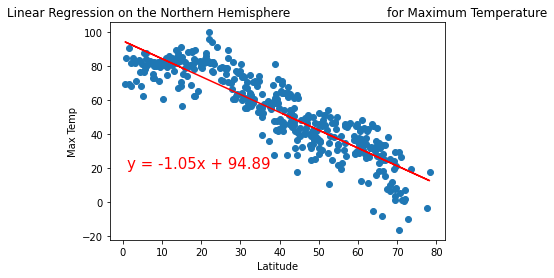

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see the equation.
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,20))

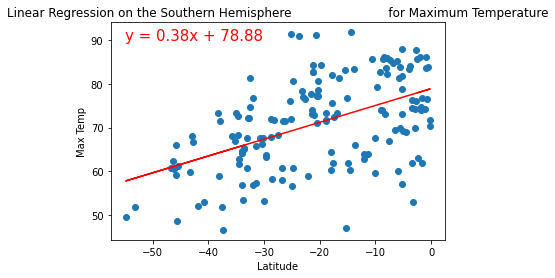

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

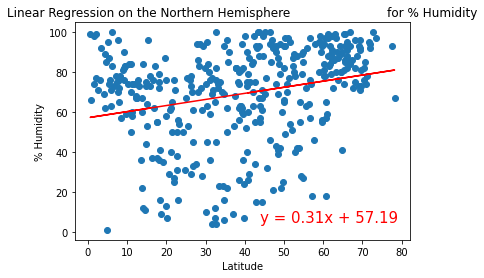

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(44,5))

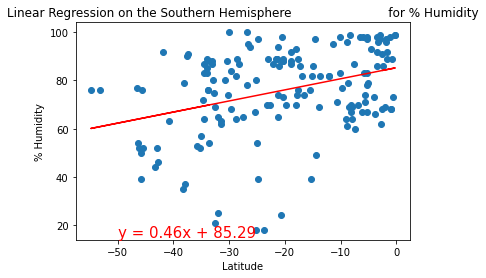

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

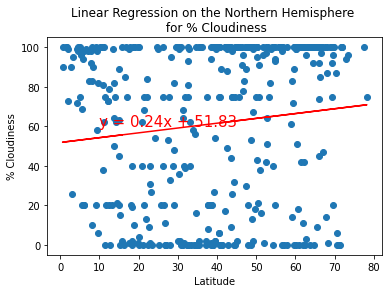

In [88]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,60))

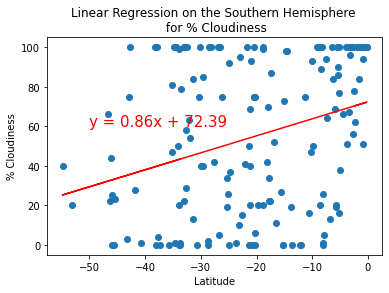

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

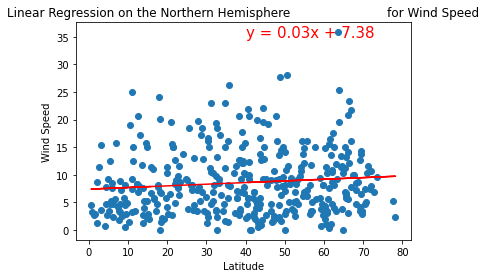

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

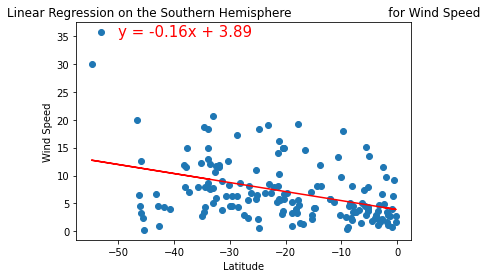

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
